In [1]:
import pandas as pd
import json
from IPython.display import JSON

data = []
with open('C:/Users/Nik/Coding/Compass/NOTES/Week_8/Day_4/tweets.txt') as f:
    for line in f:
        data.append(json.loads(line))

In [2]:
tweets = []
labels = []

for json in data:
    tweets.append(json['text'])
    
    if json['text'].find(':(') != -1:
        labels.append(0)
    else:
        labels.append(1)

In [3]:
df = pd.DataFrame(data={'tweets':tweets, 'labels':labels})
df

,tweets,labels
0,Tryna get my skill back :( Come Hangout! Follo...,0
1,I exist because I need to :),1
2,RT @lovingsunoo: sunoo looks intimidating here...,1
3,@CryptoBenny8 Three NFT gifts given out today ...,1
4,"RT @skzvana: Thank you, BTOB, for being there ...",1
...,...,...
2819,i wanted to buy more chamsims but i cant acces...,0
2820,RT @chrissaccoccia1: How to legally endorse un...,1
2821,Games w/ Friends :) https://t.co/XUbJlb2IxP,1
2822,@toknowisscience @sarahbeth345 Wait...You're o...,1


In [4]:
from sklearn.model_selection import train_test_split

X = df['tweets'].values
y = df['labels'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)
X_train

<2118x6213 sparse matrix of type '<class 'numpy.int64'>'
	with 27085 stored elements in Compressed Sparse Row format>

In [6]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)


Accuracy: 0.8215297450424929


# Convolutional NNs

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

F:\Anaconda\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
F:\Anaconda\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
F:\Anaconda\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
F:\Anaconda\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1ty

In [8]:
X = df['tweets'].values
y = df['labels'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sets a limit on how long sequences (reviews, in this case) can be
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [11]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          666500    
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
________________________________________________________

In [12]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [13]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9976
Testing Accuracy:  0.8329


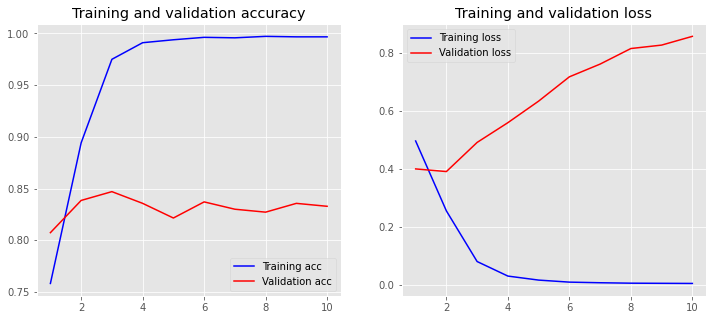

In [14]:
plot_history(history)